In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d
import time

def db2mag(db): return np.power(10, db/20)

In [4]:
# section for fitting. no need to install
from resonator_tools import circuit
from resonator_tools.circuit import notch_port

<div style="text-align: center; font-size: 45px; color: blue;">
    S5W2.7
</div>

# Fit

In [88]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Raw_data" 
sample_folders = os.listdir(global_address)
for sample_i in range(len(sample_folders)):
    if ".PNG" in sample_folders[sample_i]: pass
    else: 
        print(r"[%d]" %(sample_i), '----------->', sample_folders[sample_i]) 

[0] -----------> S11W6
[1] -----------> S18W11
[2] -----------> S5W2.7
[3] -----------> S7W4


In [89]:
sample_i_selected = 2
sample_address = global_address+"\\"+sample_folders[sample_i_selected]
sample_measurements = os.listdir(sample_address)
for meas_i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[meas_i]: pass
    else: 
        print(r"[%d]" %(meas_i), '----------->', sample_measurements[meas_i]) 

[0] -----------> Range_1
[1] -----------> Range_3
[2] -----------> Range_4


In [90]:
measurement_i_selected = 1
sample_measurement_address = sample_address+"\\"+sample_measurements[measurement_i_selected]
sample_measurement_data = os.listdir(sample_measurement_address)
for i in range(len(sample_measurement_data)):
    if ".PNG" in sample_measurement_data[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurement_data[i]) 

[0] -----------> TEMP_SCAN_range_3_res_0.mat
[1] -----------> TEMP_SCAN_range_3_res_1.mat
[2] -----------> TEMP_SCAN_range_3_res_2.mat
[3] -----------> TEMP_SCAN_range_3_res_3.mat
[4] -----------> TEMP_SCAN_range_3_res_4.mat
[5] -----------> TEMP_SCAN_range_3_res_5.mat
[6] -----------> TEMP_SCAN_range_3_res_6.mat
[7] -----------> TEMP_SCAN_range_3_res_7.mat
[8] -----------> TEMP_SCAN_range_3_res_8.mat
[9] -----------> TEMP_SCAN_range_3_res_9.mat


In [57]:
resonator = 0
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
mat.keys()

Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_0.mat


dict_keys(['__header__', '__version__', '__globals__', 'add_att_inside', 'freq', 'powers', 'vna', 'mags', 'phas', 'temps'])

In [50]:
print(mat['add_att_inside'][0][0])
print(mat['vna'][0])
start_freq = mat['vna'][0][0][2][0][0]
stop_freq = mat['vna'][0][0][3][0][0]
nop = mat['vna'][0][0][4][0][0]
freqs = np.linspace(start_freq, stop_freq, nop)
print(len(freqs))
power = mat['powers'][0][0]
print(power)
phas = mat['phas'][:,:nop]
print(phas.shape)
mags = mat['mags'][:,:nop]
print(mags.shape)
temps = mat['temps'][0]
print(mags.shape)

20
[(array([[4.61253018e+09]]), array([[400000.]]), array([[4.61233018e+09]]), array([[4.61273018e+09]]), array([[5001]]), array([[18.4795]]), array([[100]]), array([[-25]]), array([[0]]), array([[1]]))]
5001
-25
(8, 5001)
(8, 5001)
(8, 5001)


In [33]:
temps

array([1.10847, 1.10847, 1.10847, 1.47218, 1.54449, 1.54464, 1.54464,
       1.72011])

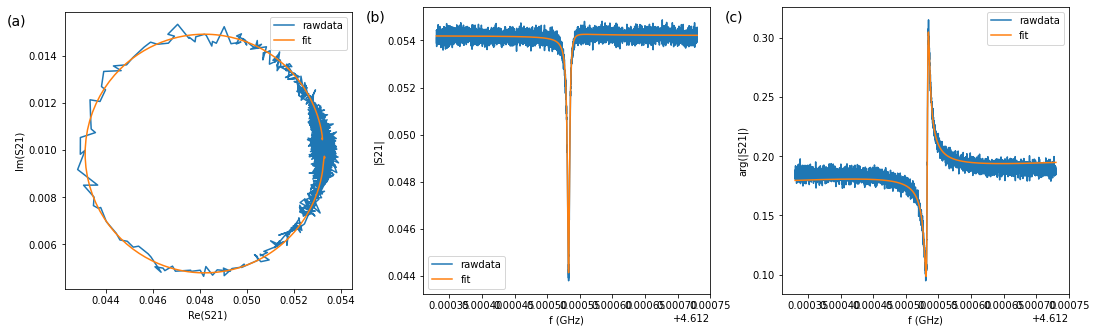

{'Qi_dia_corr': 1405183.7502538466,
 'Qi_no_corr': 1408368.6953991011,
 'absQc': 6128208.071720275,
 'Qc_dia_corr': 6189249.397875652,
 'Ql': 1145185.2311459666,
 'fr': 4612533046.621217,
 'theta0': 3.001031417226313,
 'phi0': -0.1405612363634804,
 'phi0_err': 0.007745615983542365,
 'Ql_err': 11255.959777294498,
 'absQc_err': 41410.920324065606,
 'fr_err': 21.38840717130252,
 'chi_square': 3.4908340993520616e-05,
 'Qi_no_corr_err': 15712.036170268195,
 'Qi_dia_corr_err': 15665.456801138898}

In [36]:
# testing fit
# %matplotlib qt
power_num = -1
S21 = db2mag(mags[power_num])*np.exp(1j*(phas[power_num]))
port1 = notch_port(freqs, S21)
port1.autofit()
port1.plotall()
port1.fitresults

# Fit all powers for all resonators

NEW RESONATOR -->  0
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_0.mat
(43, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

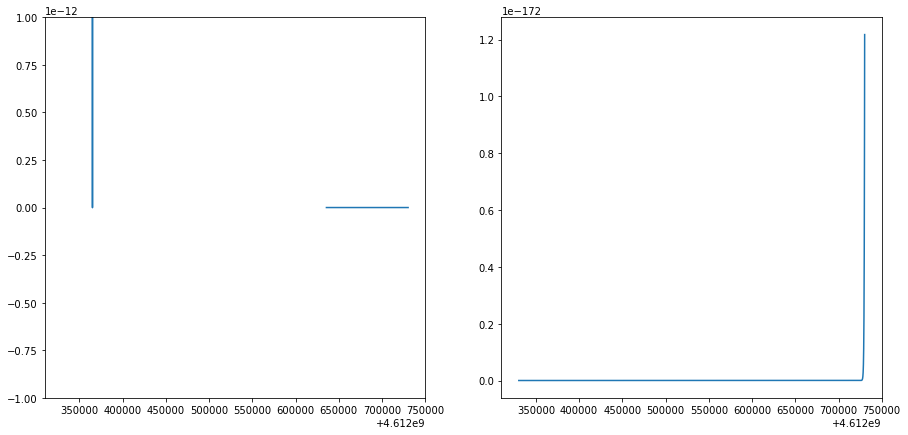

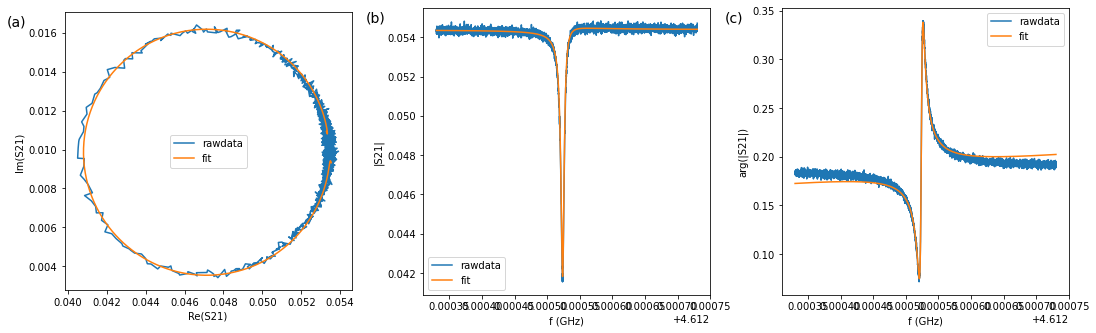

2.3981701180453285e-05
1.10847
New fit


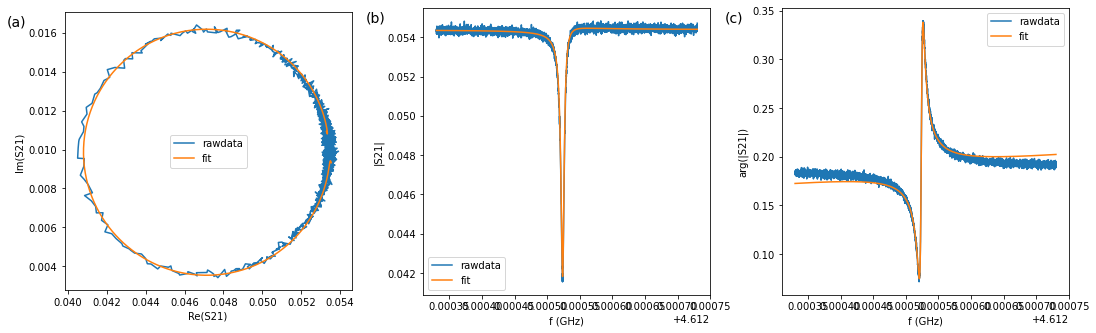

2.3981701180453285e-05
1.47218
New fit


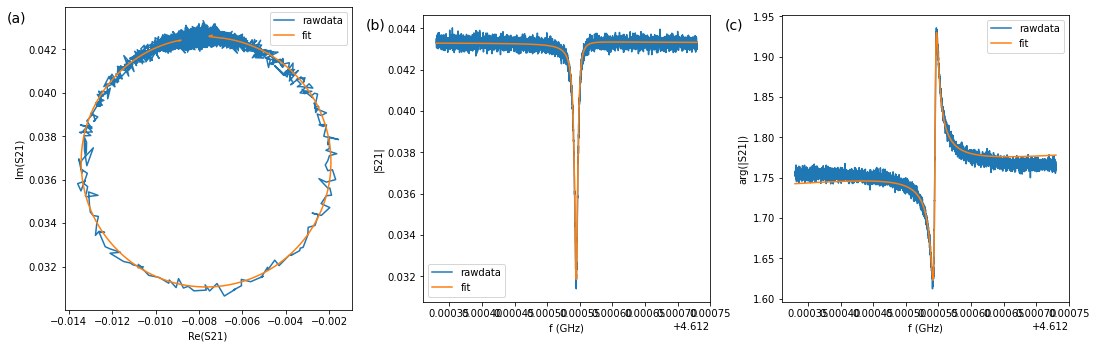

4.4733733516544305e-05
1.54449
New fit


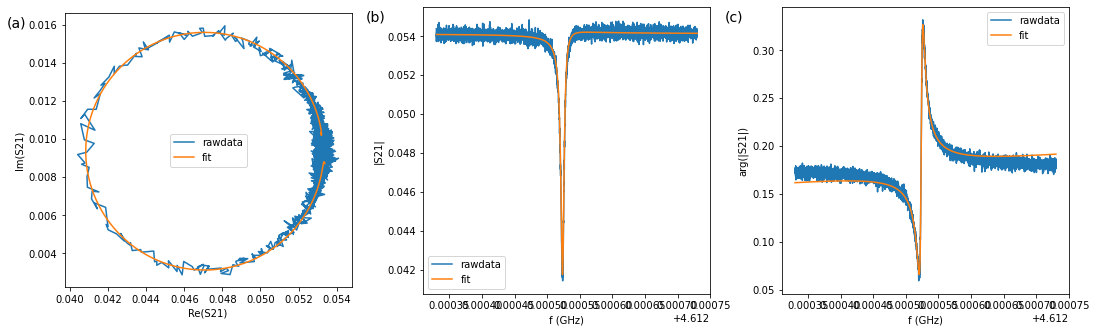

2.3866244891479482e-05
1.54464
New fit


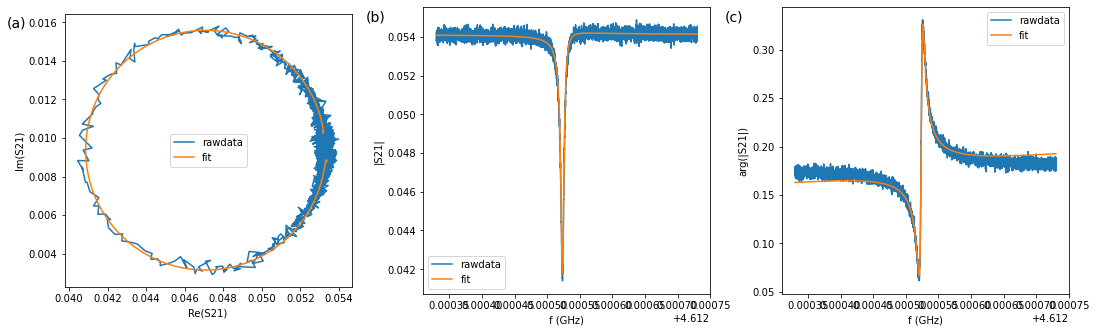

2.373685876744247e-05
1.54464
New fit


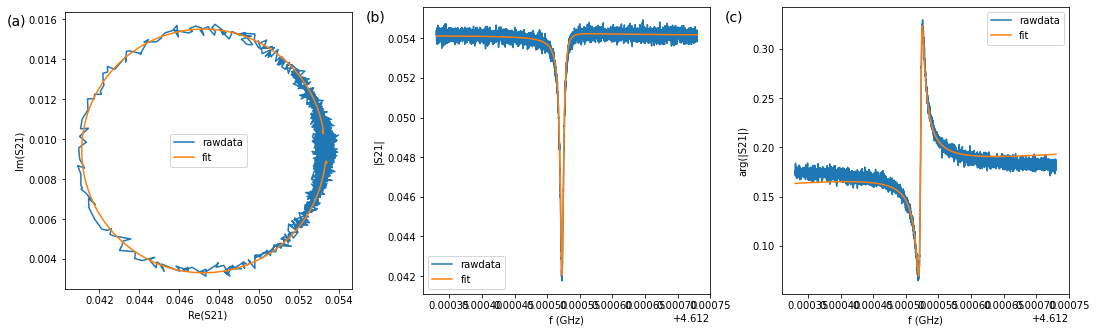

2.2964711694051232e-05
1.72011
New fit


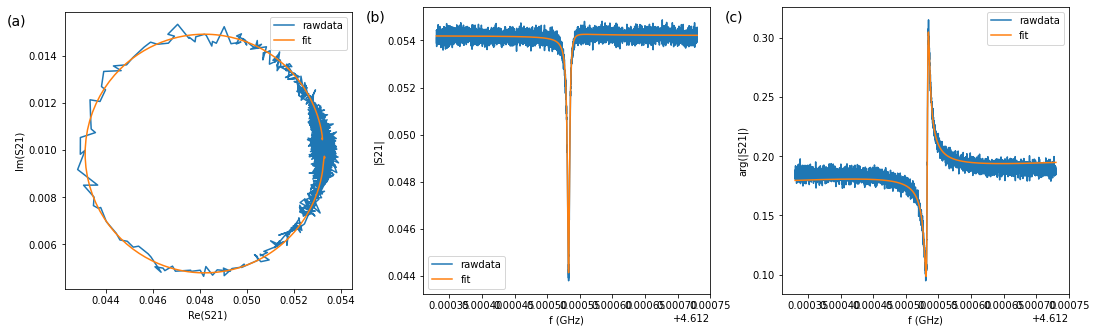

3.304662121728086e-05
NEW RESONATOR -->  1
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_1.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

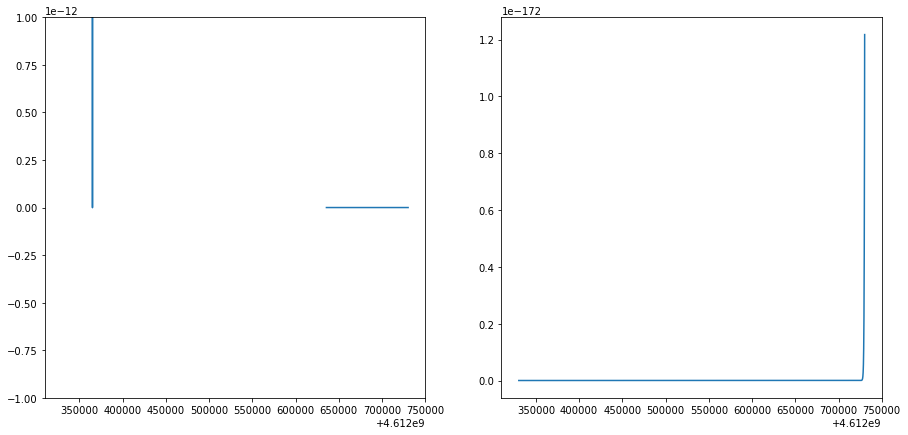

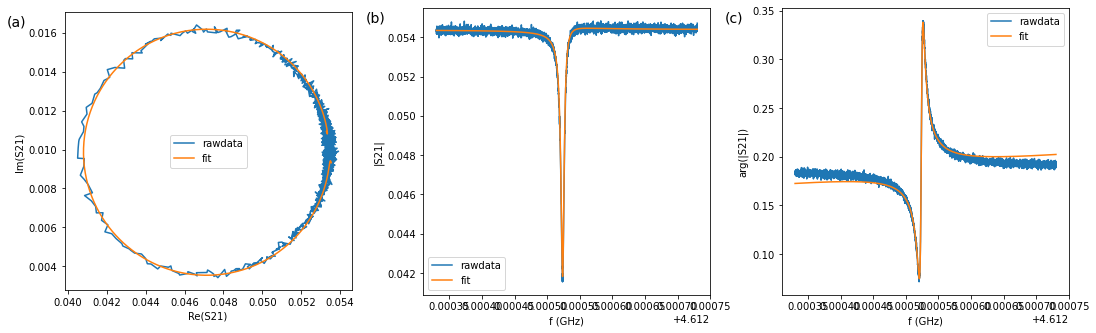

2.3981701180453285e-05
1.10847
New fit


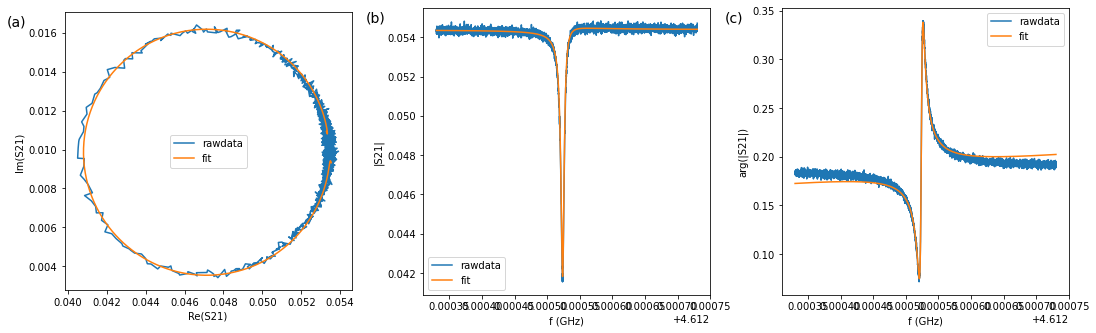

2.3981701180453285e-05
1.47218
New fit


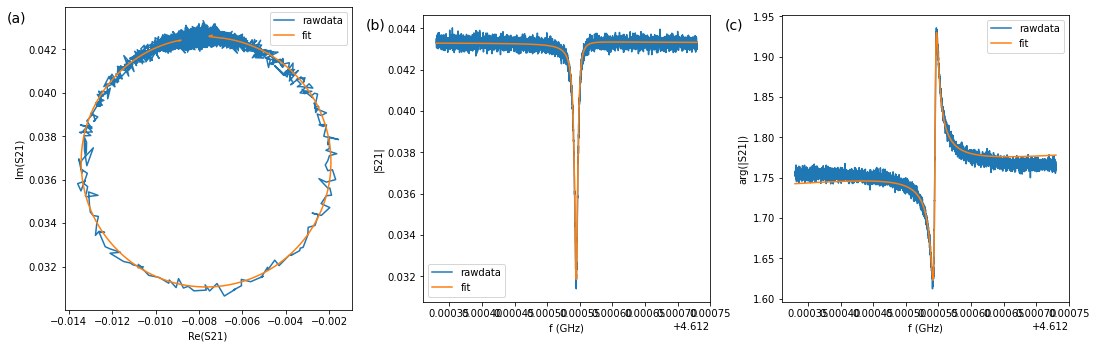

4.4733733516544305e-05
1.54449
New fit


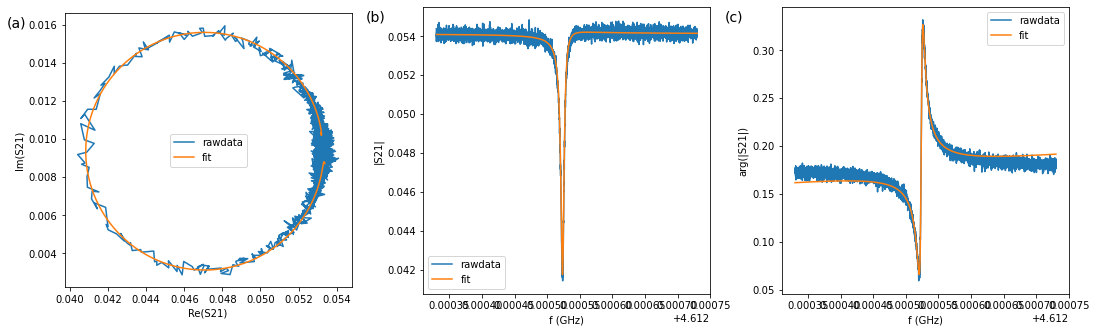

2.3866244891479482e-05
1.54464
New fit


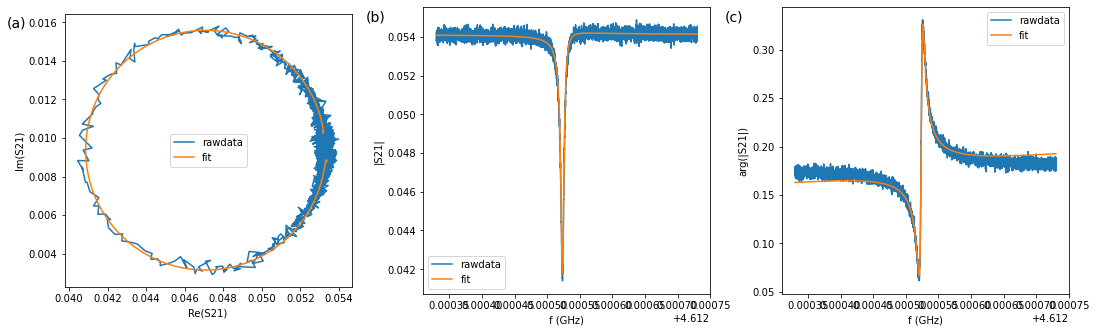

2.373685876744247e-05
1.54464
New fit


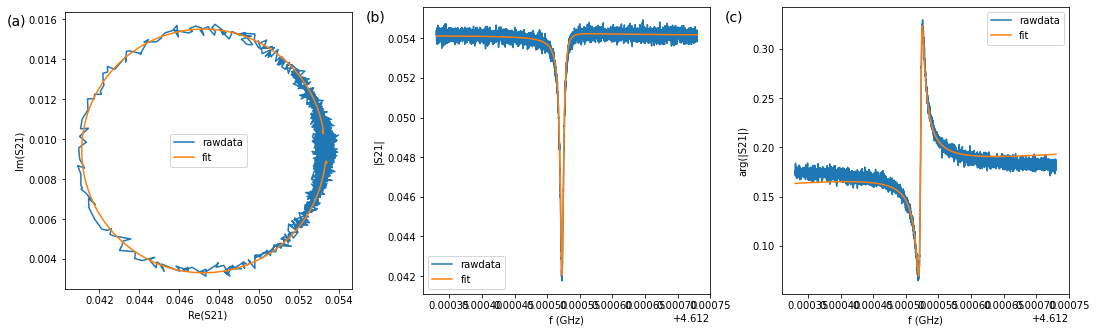

2.2964711694051232e-05
1.72011
New fit


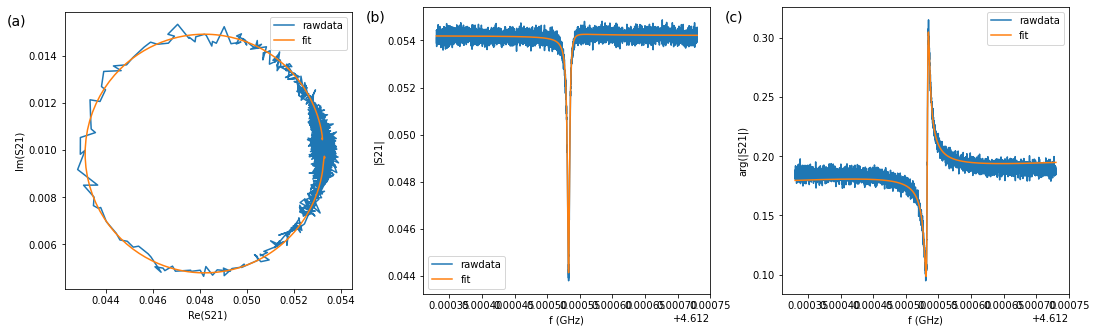

3.304662121728086e-05
NEW RESONATOR -->  2
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_2.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

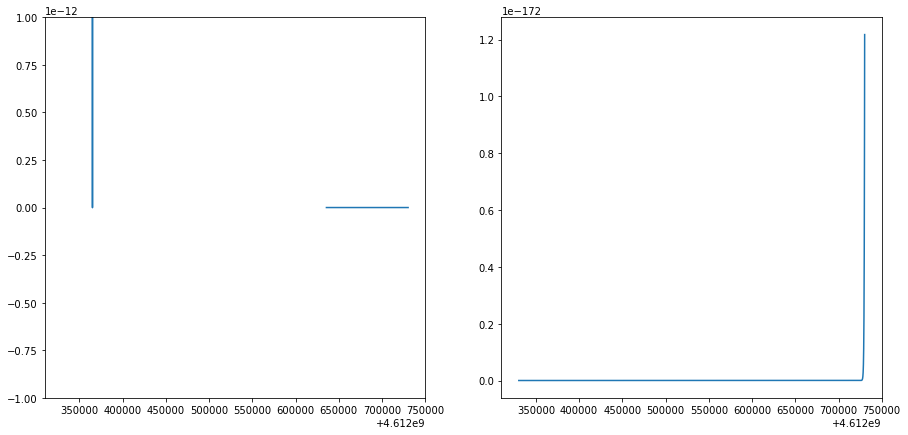

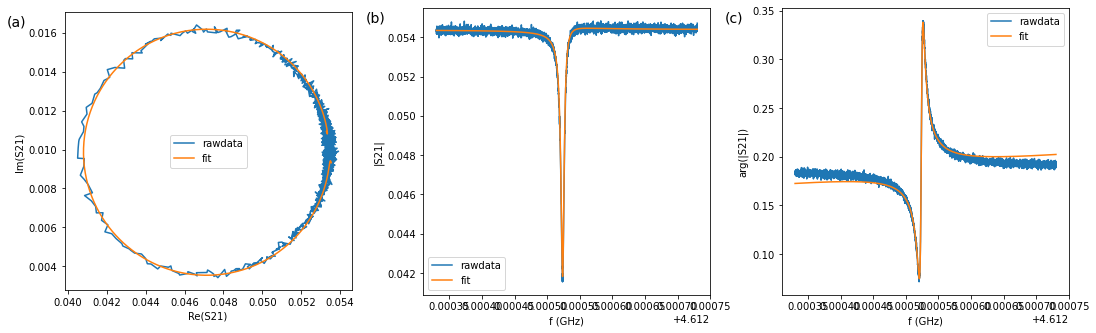

2.3981701180453285e-05
1.10847
New fit


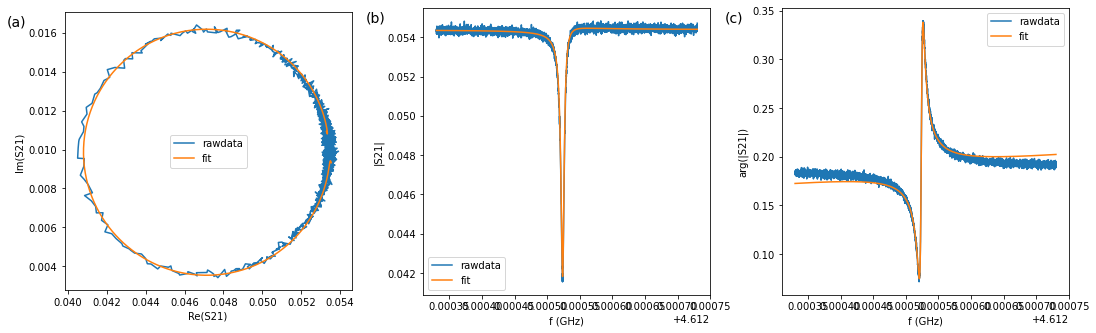

2.3981701180453285e-05
1.47218
New fit


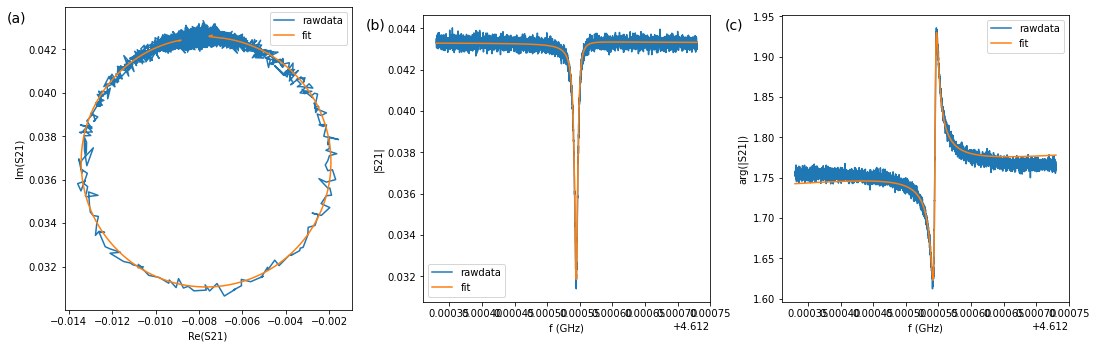

4.4733733516544305e-05
1.54449
New fit


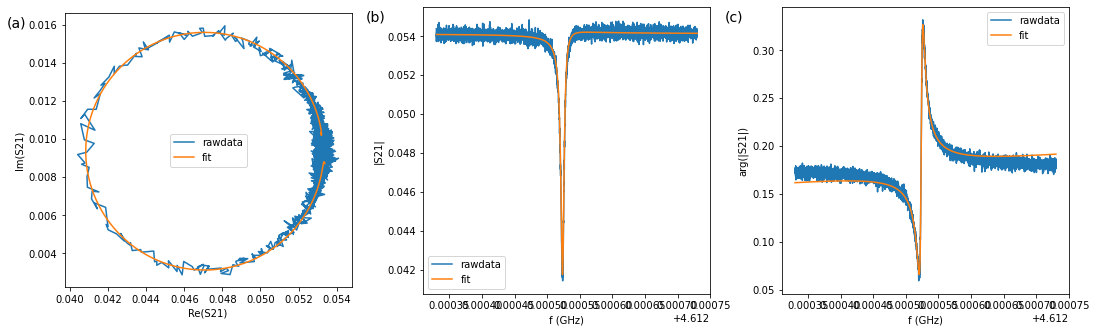

2.3866244891479482e-05
1.54464
New fit


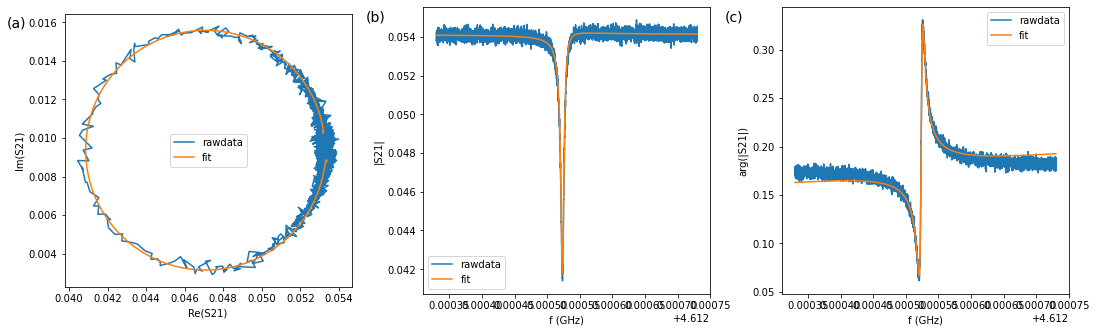

2.373685876744247e-05
1.54464
New fit


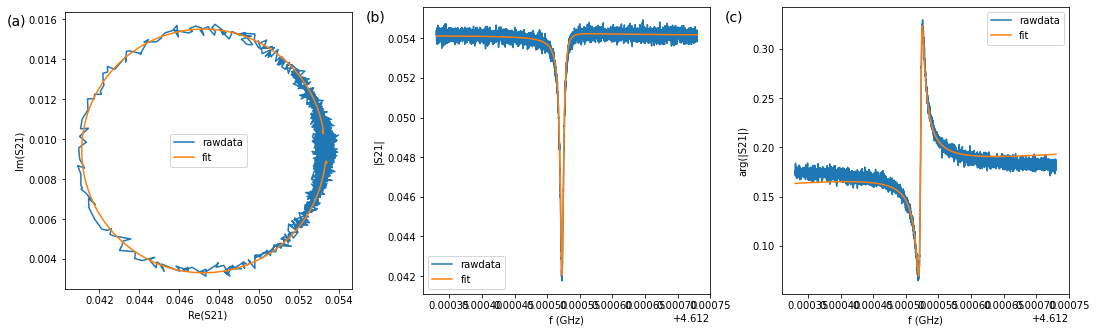

2.2964711694051232e-05
1.72011
New fit


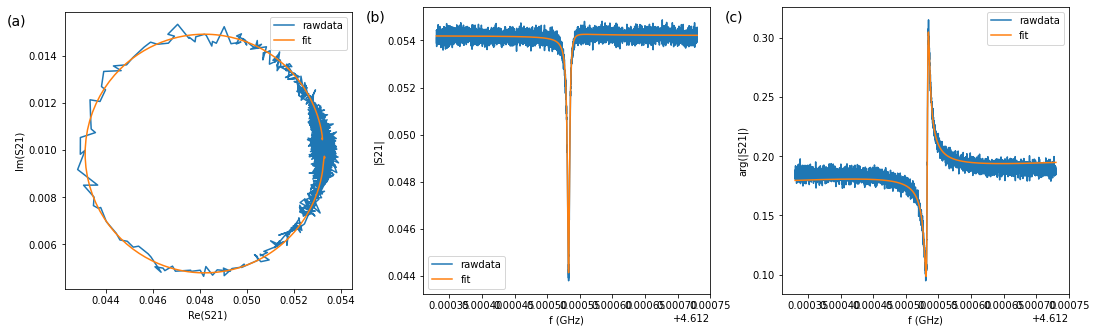

3.304662121728086e-05
NEW RESONATOR -->  3
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_3.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

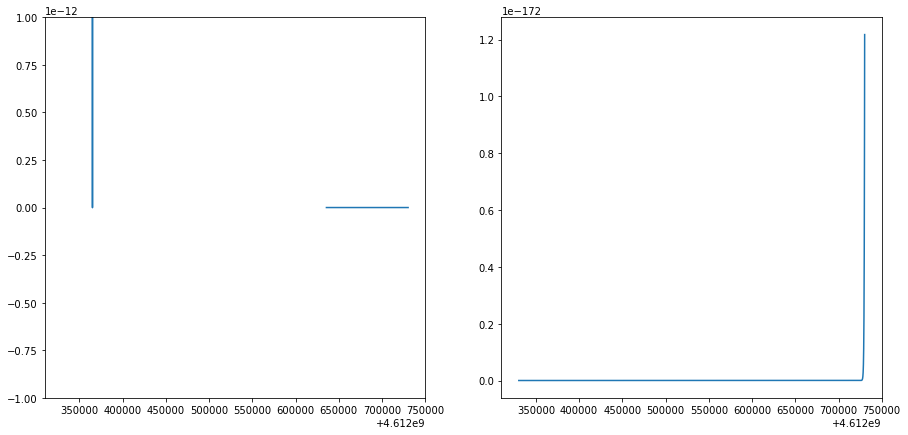

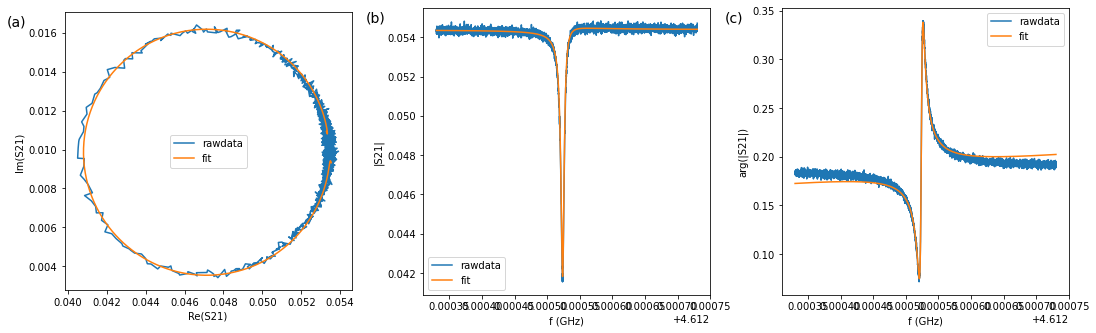

2.3981701180453285e-05
1.10847
New fit


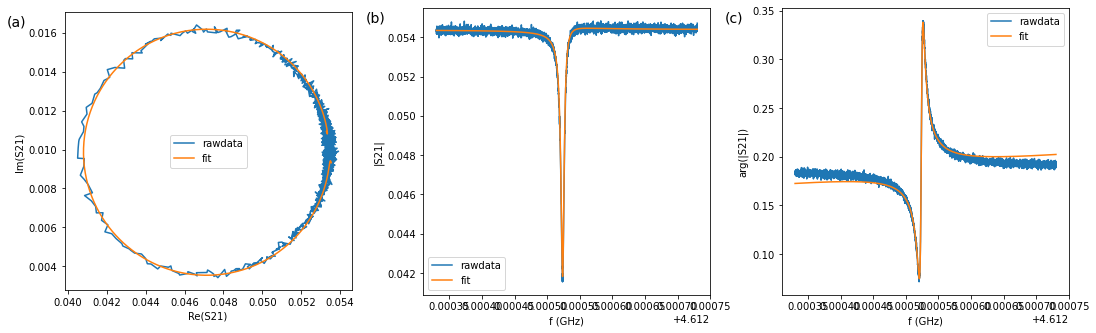

2.3981701180453285e-05
1.47218
New fit


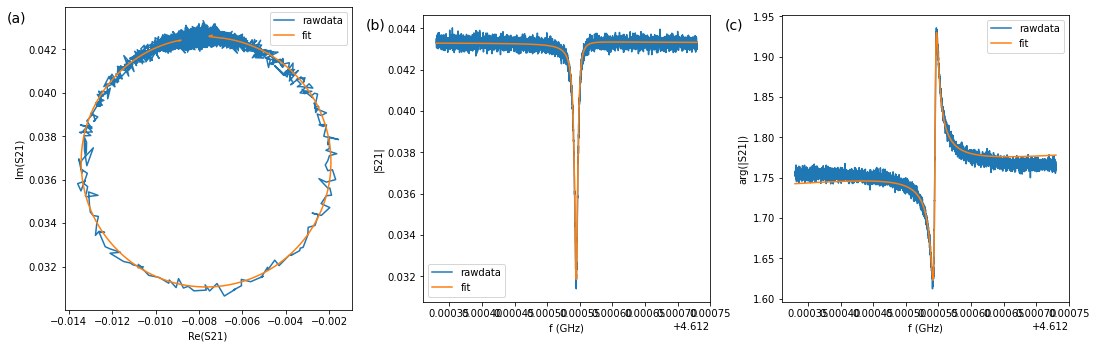

4.4733733516544305e-05
1.54449
New fit


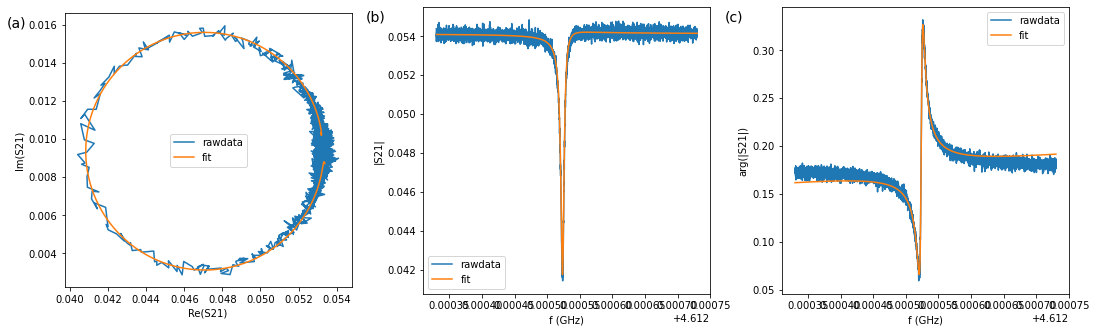

2.3866244891479482e-05
1.54464
New fit


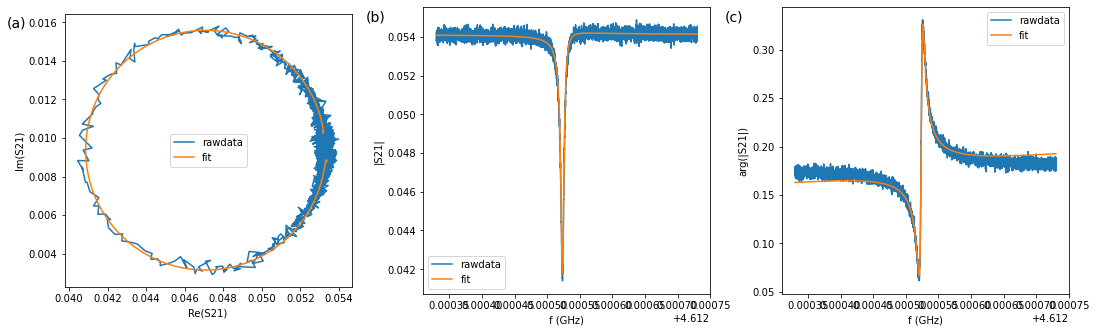

2.373685876744247e-05
1.54464
New fit


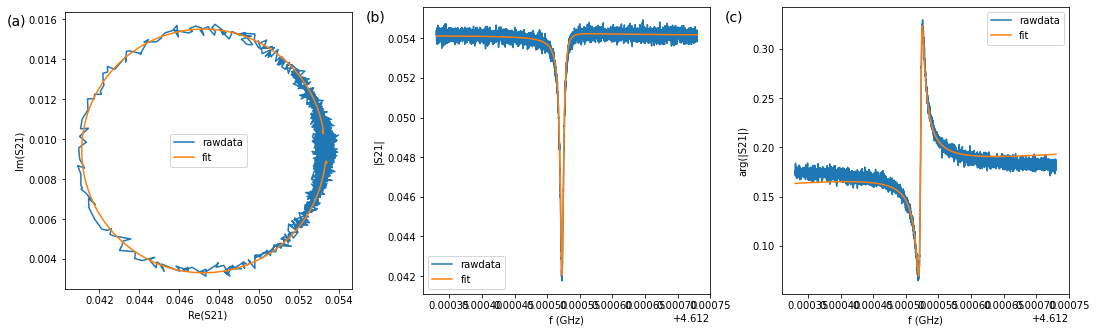

2.2964711694051232e-05
1.72011
New fit


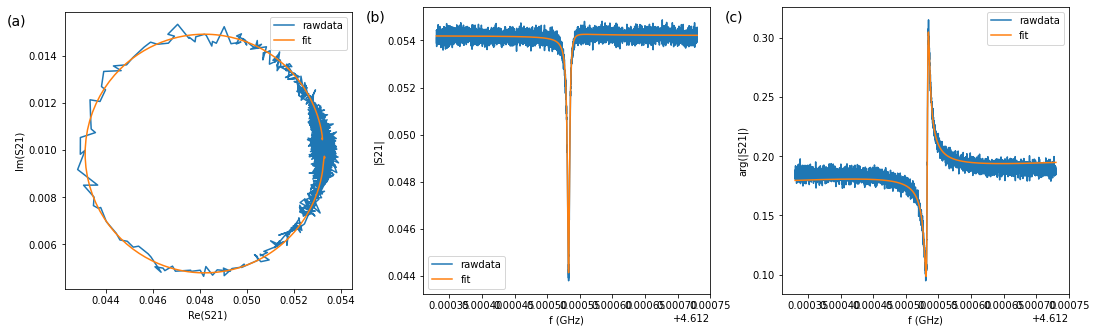

3.304662121728086e-05
NEW RESONATOR -->  4
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_4.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

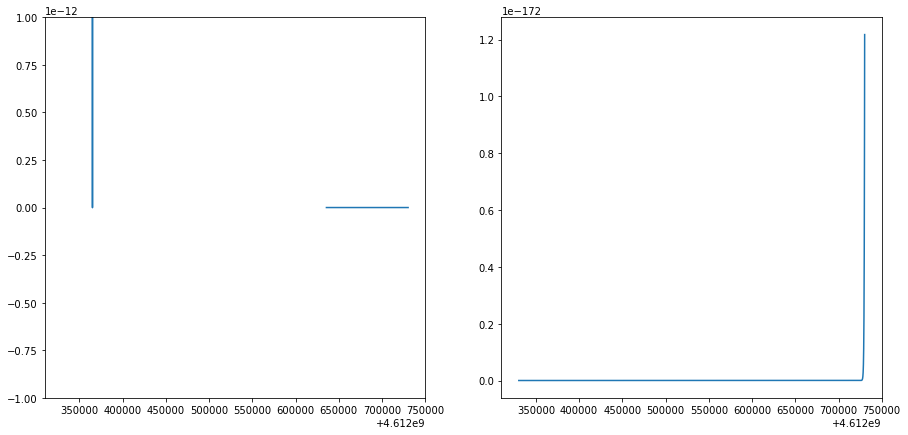

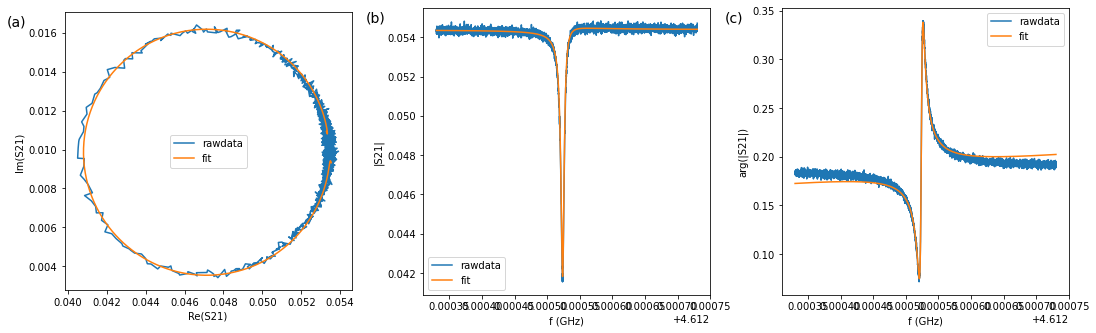

2.3981701180453285e-05
1.10847
New fit


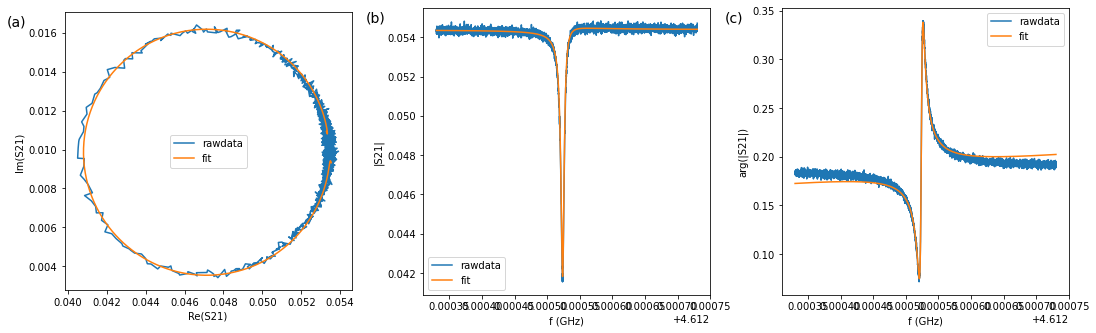

2.3981701180453285e-05
1.47218
New fit


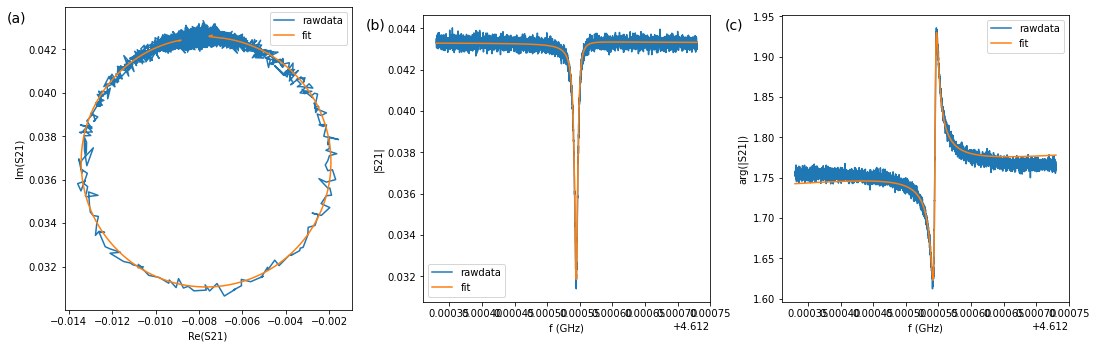

4.4733733516544305e-05
1.54449
New fit


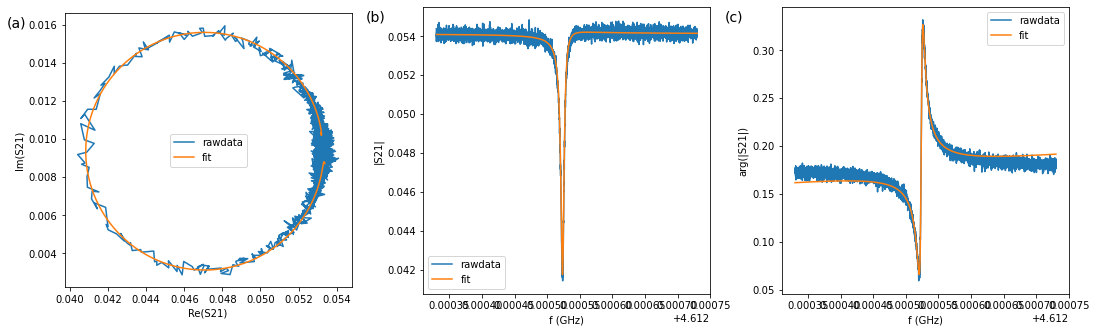

2.3866244891479482e-05
1.54464
New fit


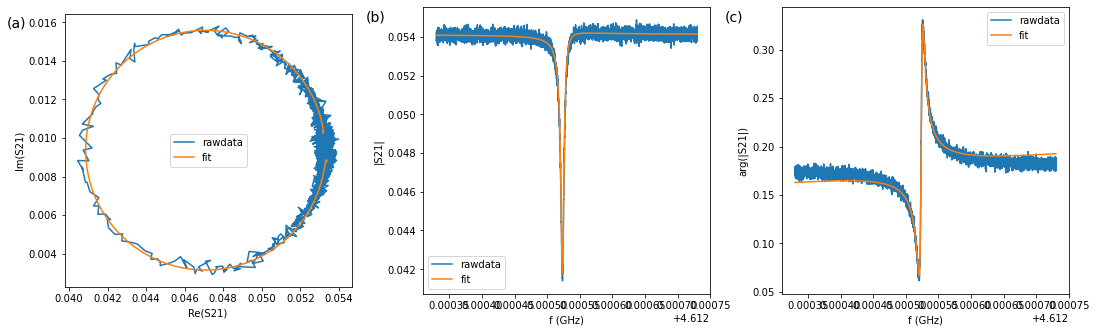

2.373685876744247e-05
1.54464
New fit


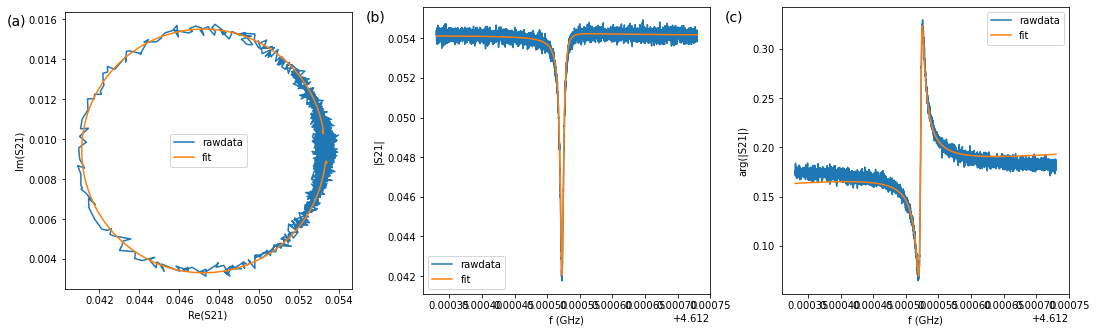

2.2964711694051232e-05
1.72011
New fit


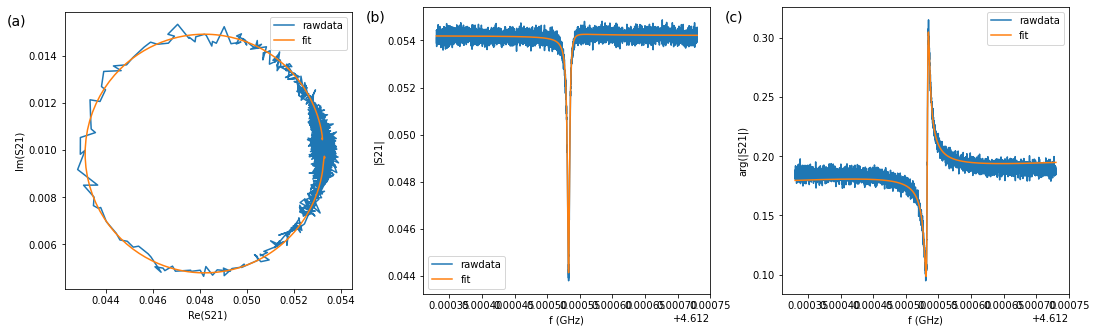

3.304662121728086e-05
NEW RESONATOR -->  5
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_5.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

New fit


C:\Users\mukha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2566: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


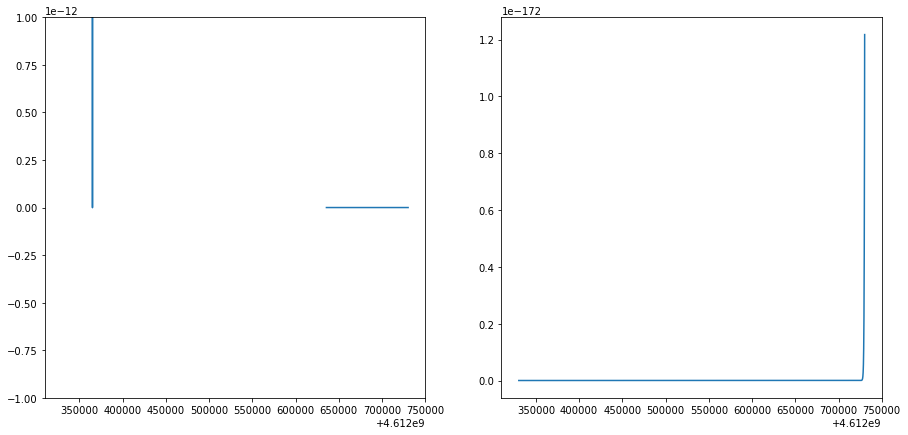

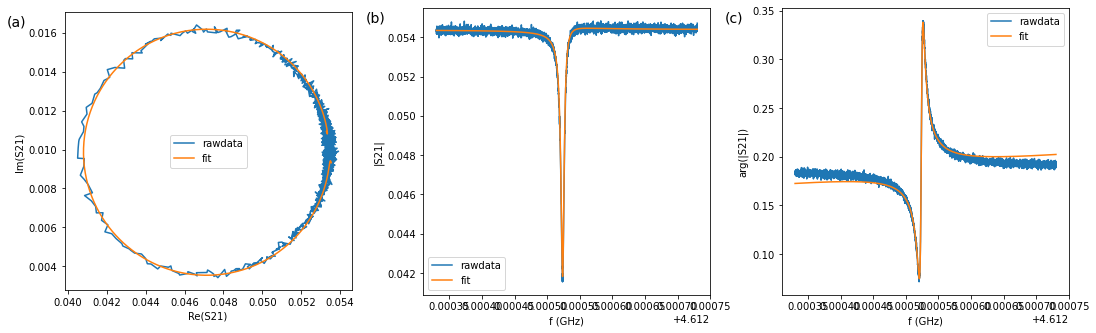

2.3981701180453285e-05
1.10847
New fit


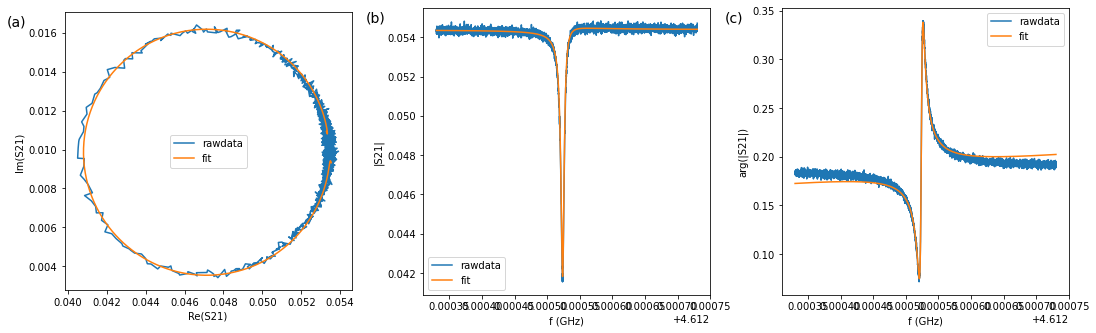

2.3981701180453285e-05
1.47218
New fit


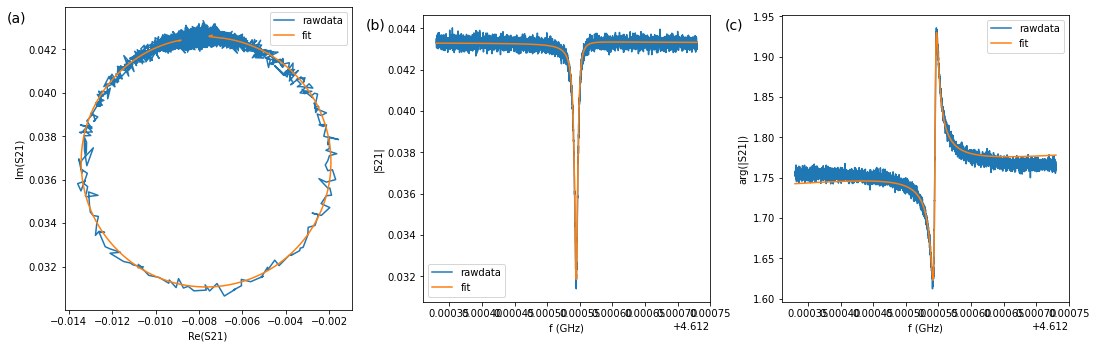

4.4733733516544305e-05
1.54449
New fit


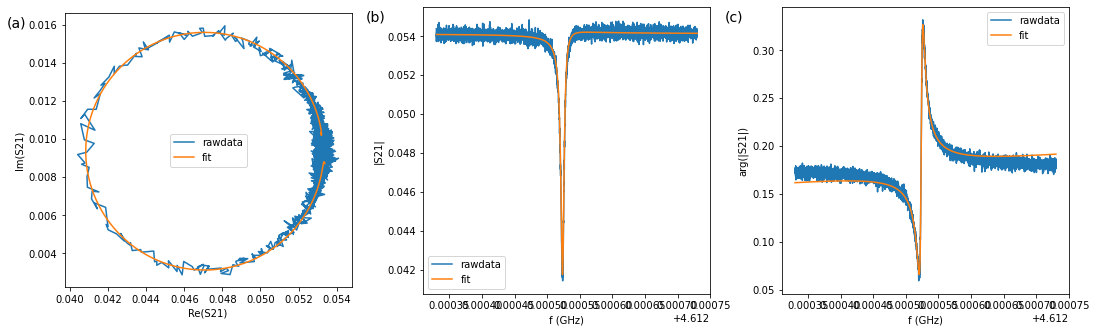

2.3866244891479482e-05
1.54464
New fit


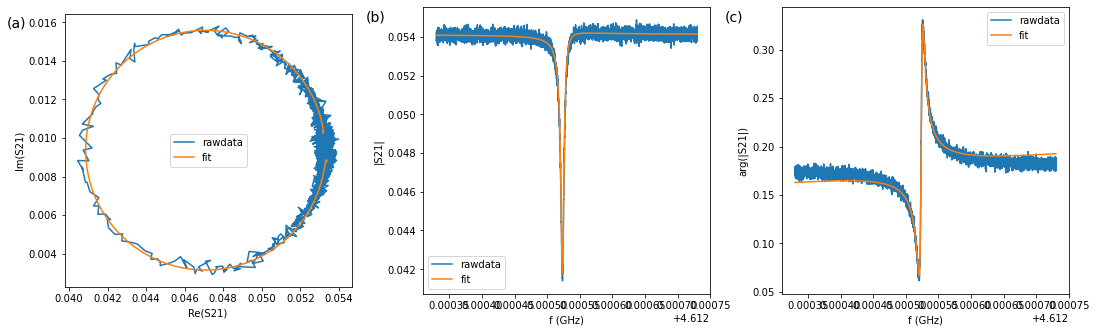

2.373685876744247e-05
1.54464
New fit


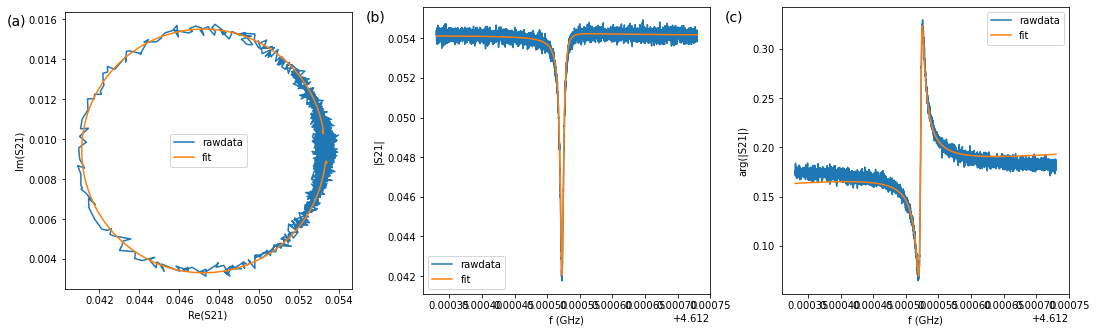

2.2964711694051232e-05
1.72011
New fit


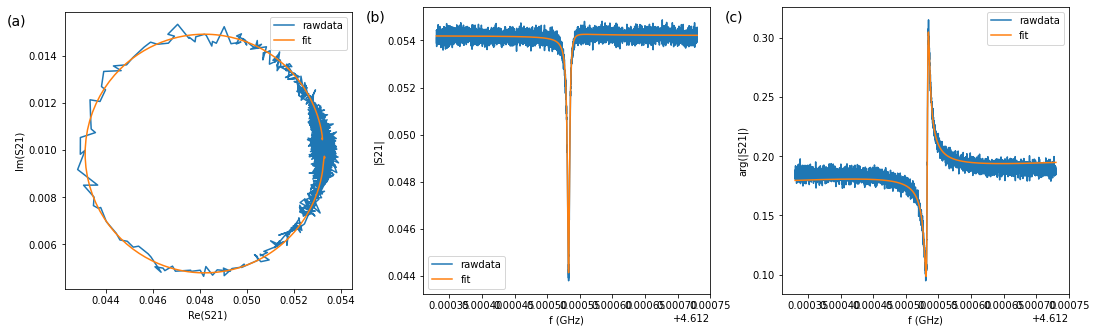

3.304662121728086e-05
NEW RESONATOR -->  6
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_6.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

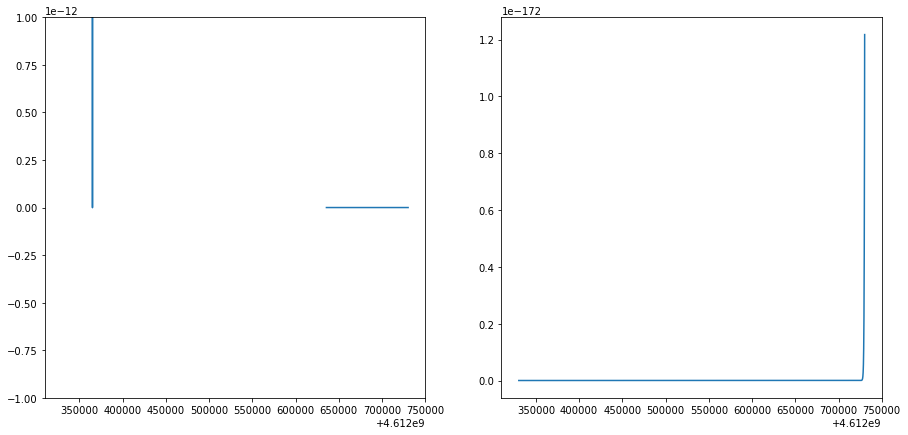

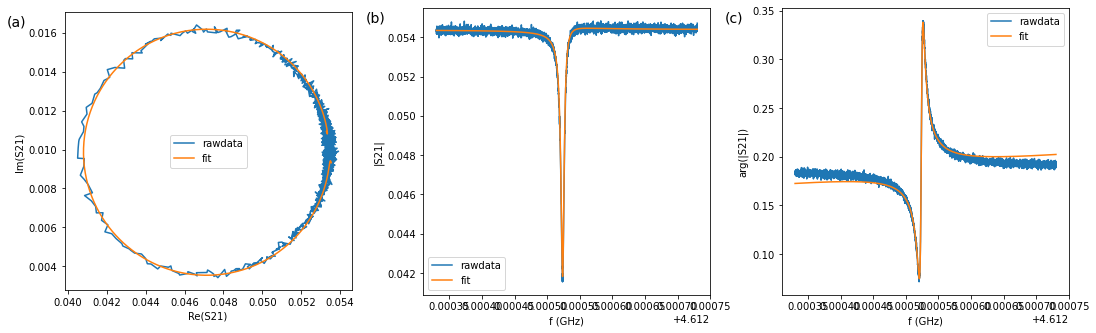

2.3981701180453285e-05
1.10847
New fit


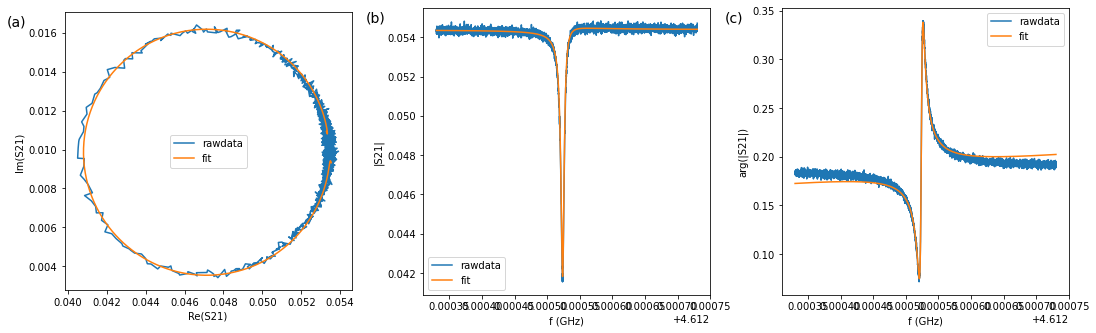

2.3981701180453285e-05
1.47218
New fit


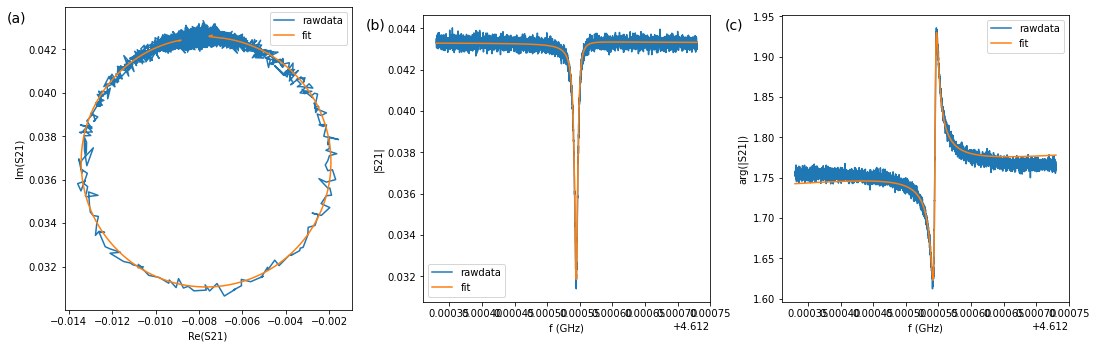

4.4733733516544305e-05
1.54449
New fit


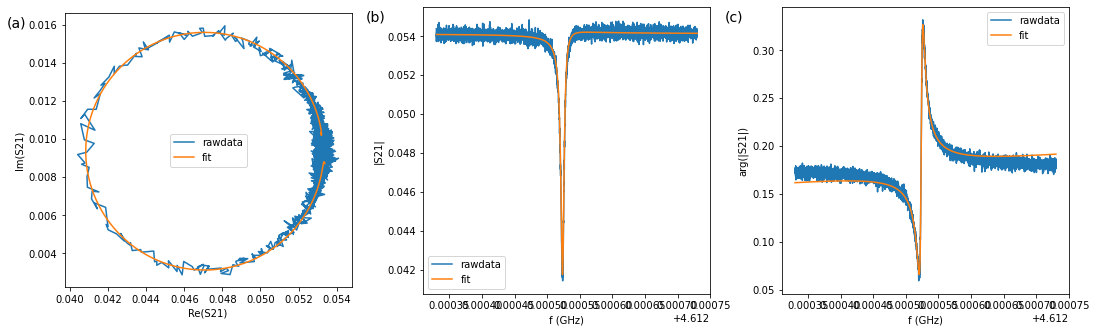

2.3866244891479482e-05
1.54464
New fit


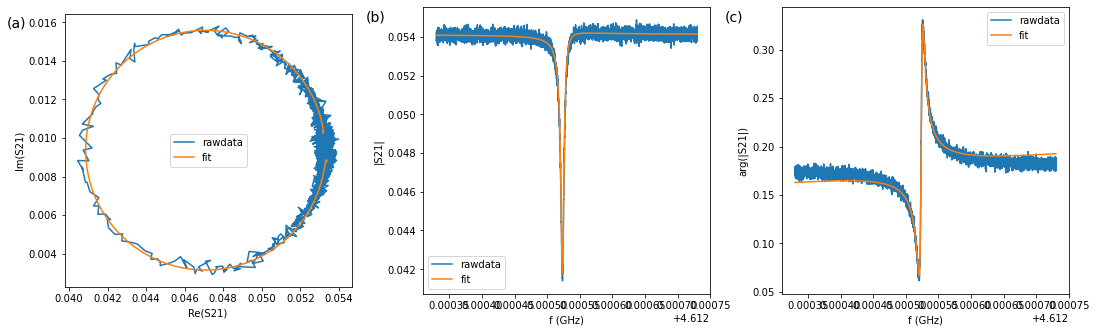

2.373685876744247e-05
1.54464
New fit


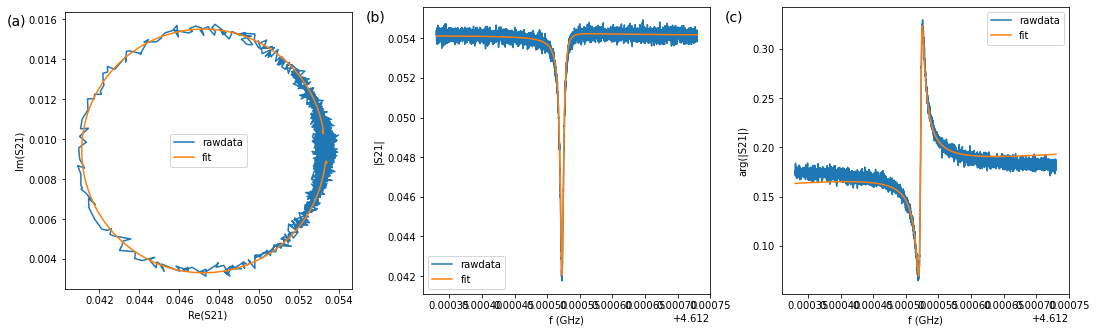

2.2964711694051232e-05
1.72011
New fit


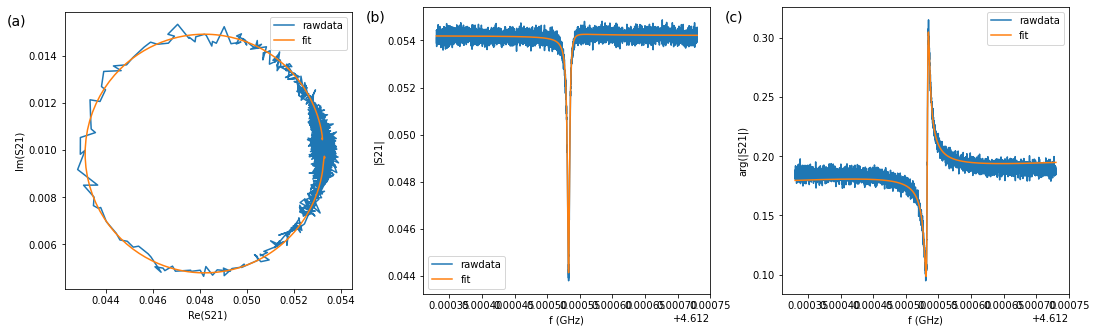

3.304662121728086e-05
NEW RESONATOR -->  7
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_7.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

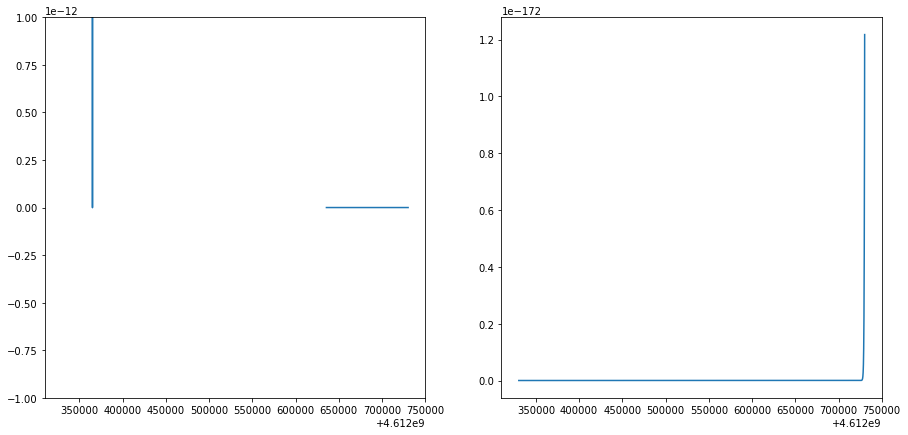

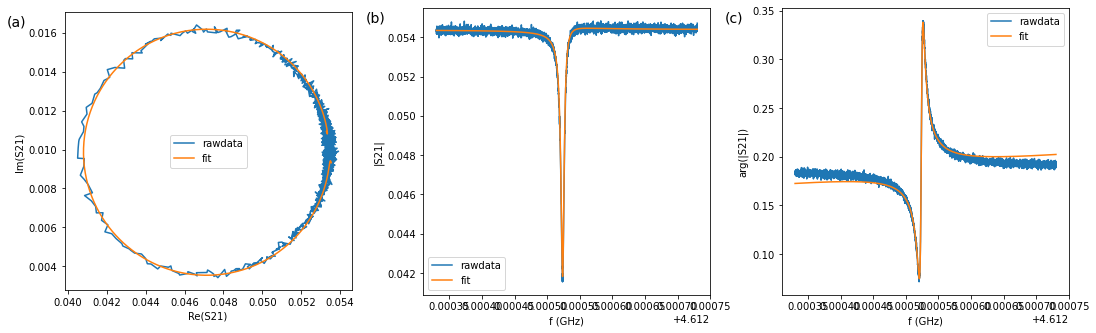

2.3981701180453285e-05
1.10847
New fit


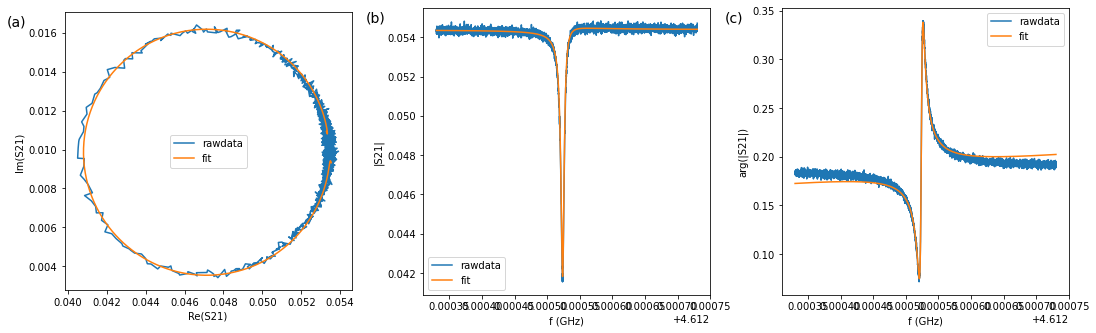

2.3981701180453285e-05
1.47218
New fit


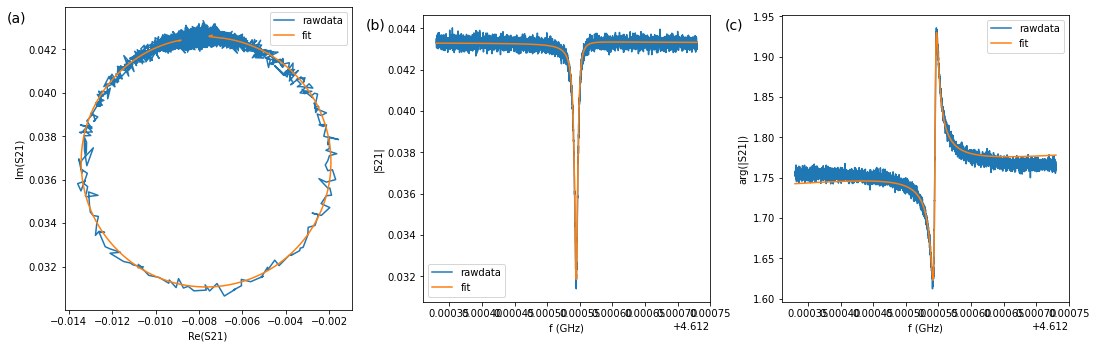

4.4733733516544305e-05
1.54449
New fit


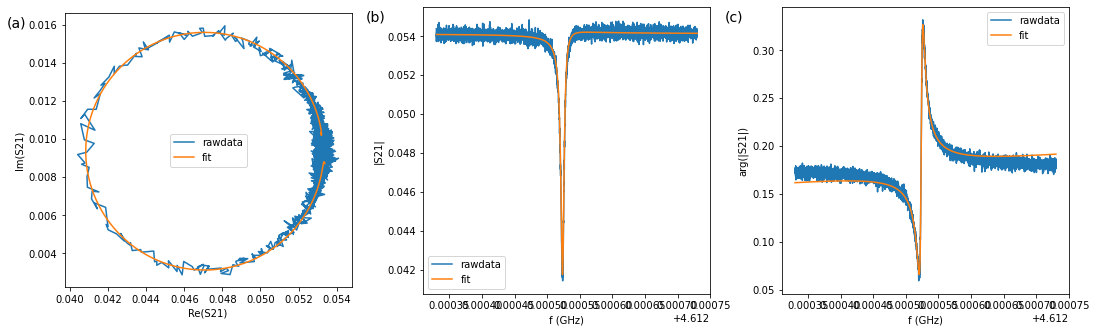

2.3866244891479482e-05
1.54464
New fit


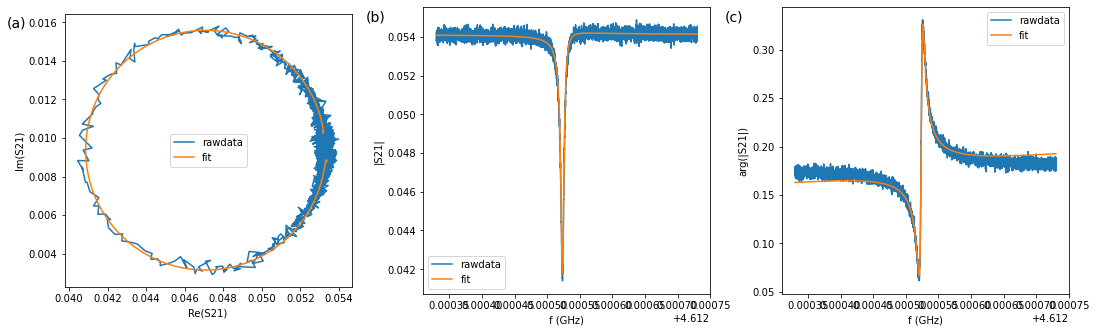

2.373685876744247e-05
1.54464
New fit


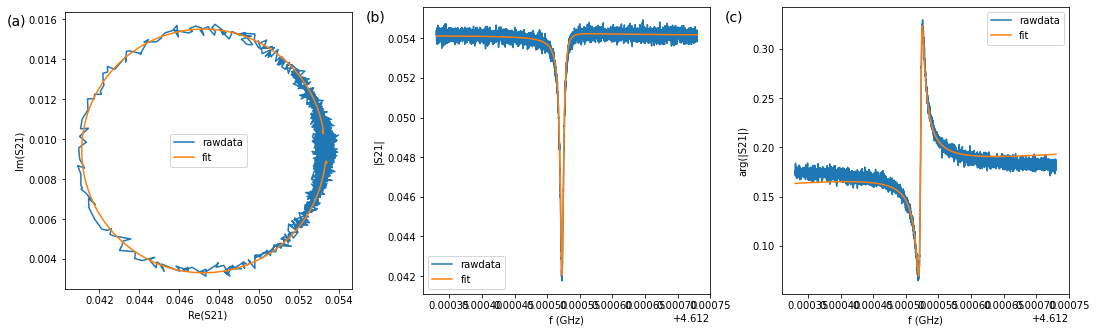

2.2964711694051232e-05
1.72011
New fit


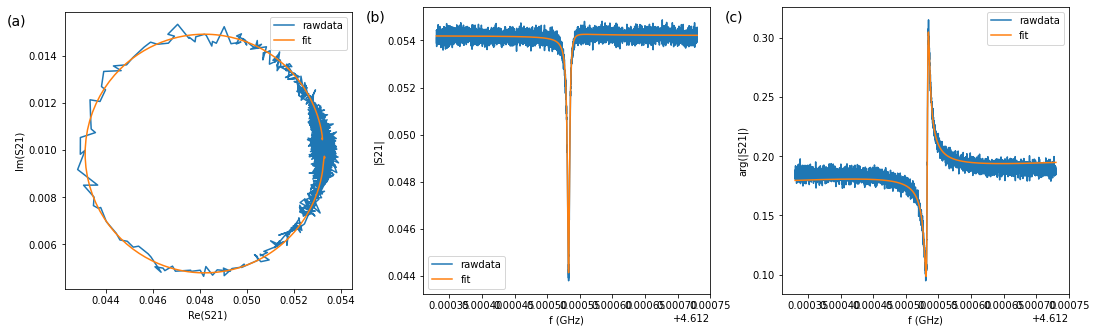

3.304662121728086e-05
NEW RESONATOR -->  8
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_8.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

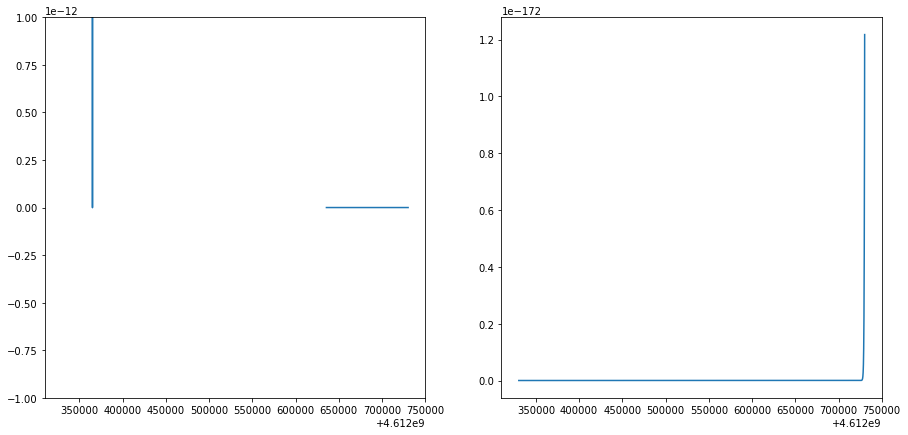

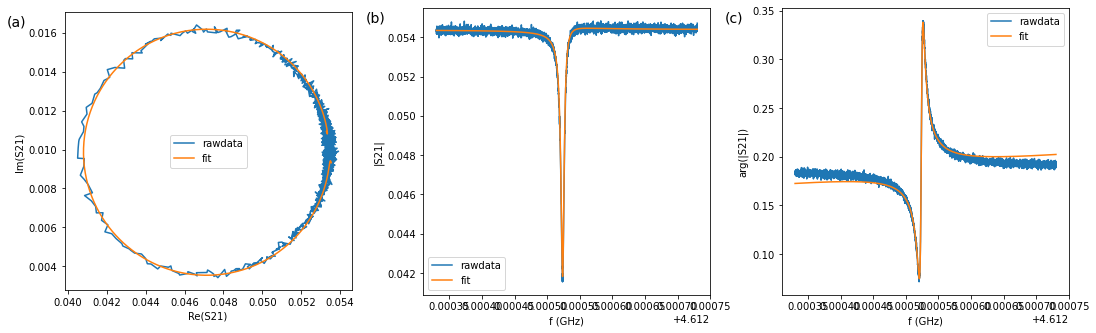

2.3981701180453285e-05
1.10847
New fit


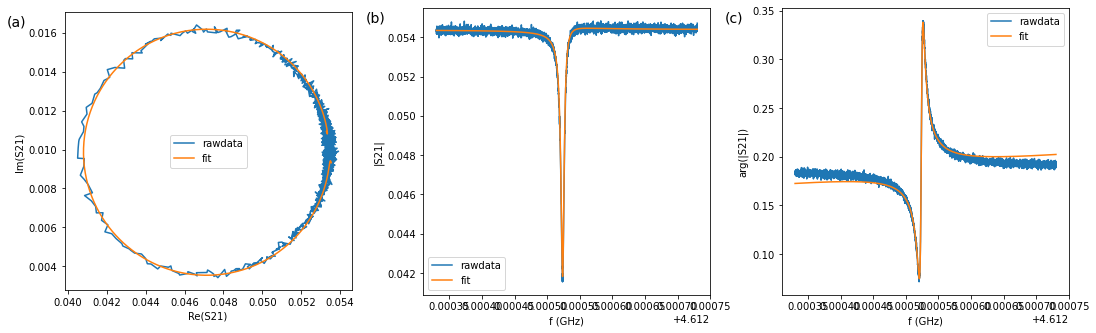

2.3981701180453285e-05
1.47218
New fit


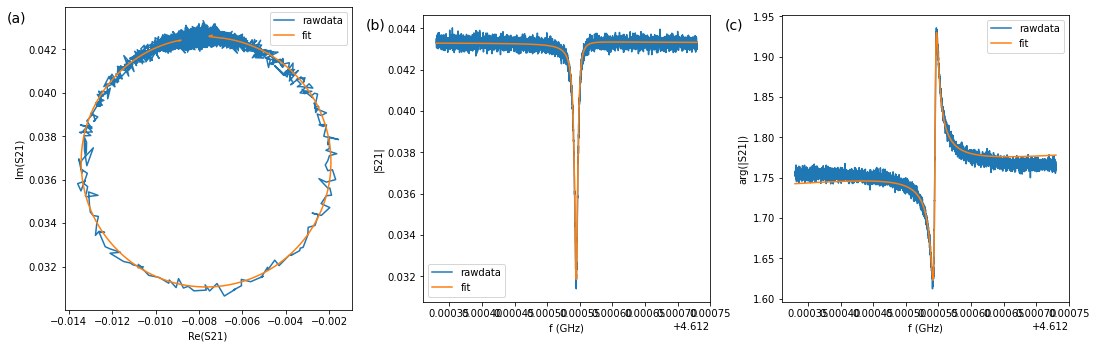

4.4733733516544305e-05
1.54449
New fit


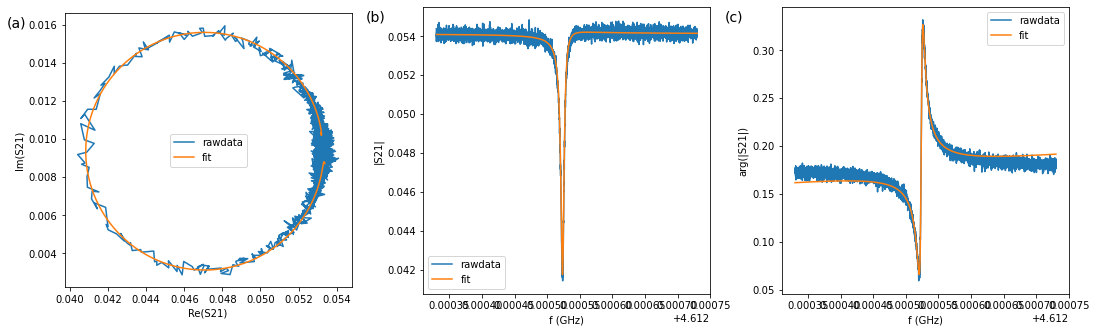

2.3866244891479482e-05
1.54464
New fit


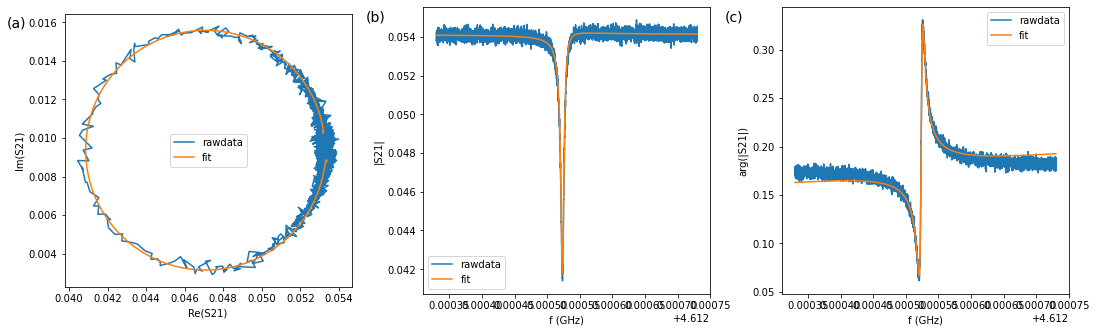

2.373685876744247e-05
1.54464
New fit


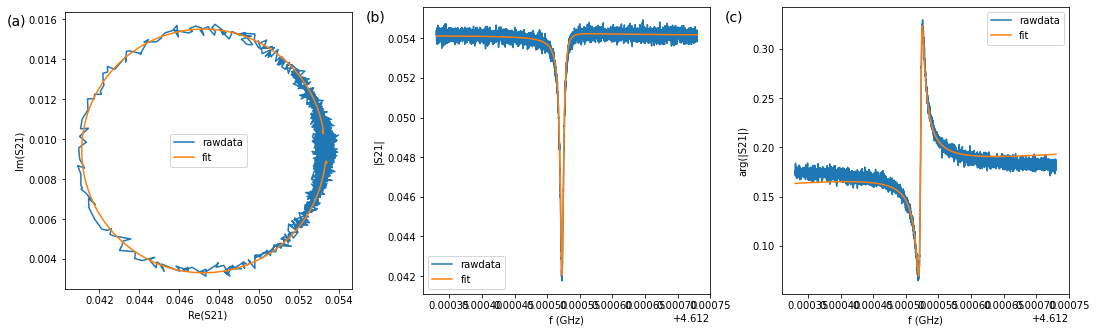

2.2964711694051232e-05
1.72011
New fit


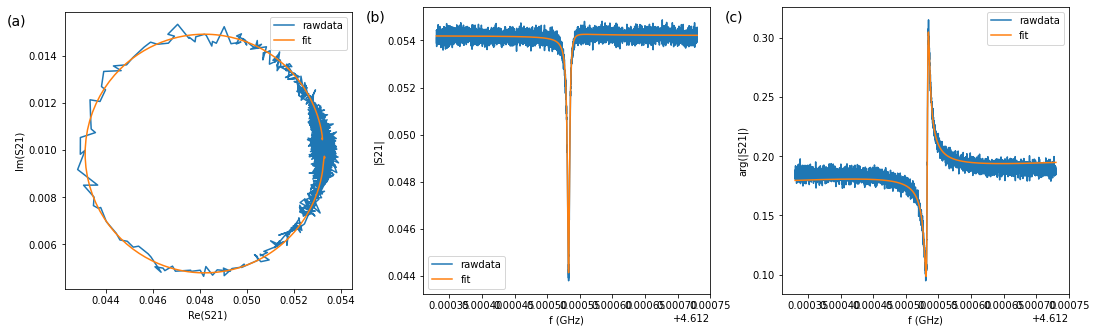

3.304662121728086e-05
NEW RESONATOR -->  9
Data\Temperature_sweep\Raw_data\S5W2.7\Range_3\TEMP_SCAN_range_3_res_9.mat
(8, 5001)
(8, 5001)
1.10847
New fit
1.10847
New fit


<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: invalid value encountered in divide
  def db2mag(db): return np.power(10, db/20)
<ipython-input-72-51ed01ff900a>:9: RuntimeWarning: overflow encountered in power
  def db2mag(db): return np.power(10, db/20)
<ipython-input-91-34e7ba079776>:34: RuntimeWarning: invalid value encountered in multiply
  S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:304: RuntimeWarning: invalid value encountered in divide
  z_data = z_data/maxval
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarn

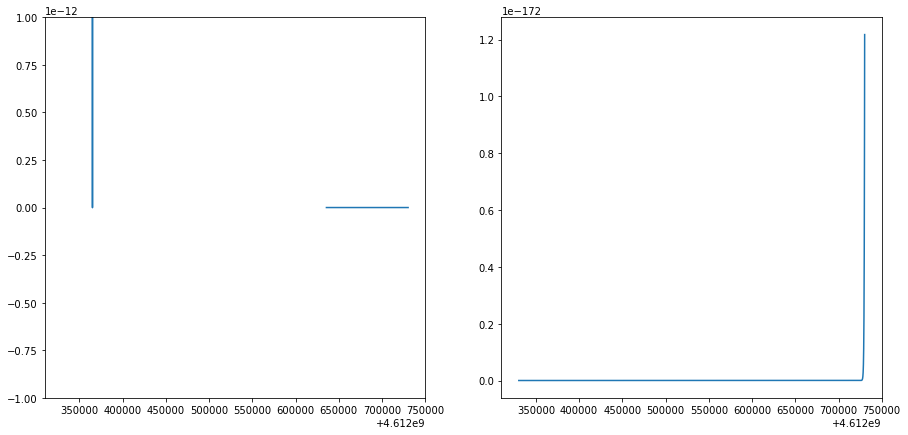

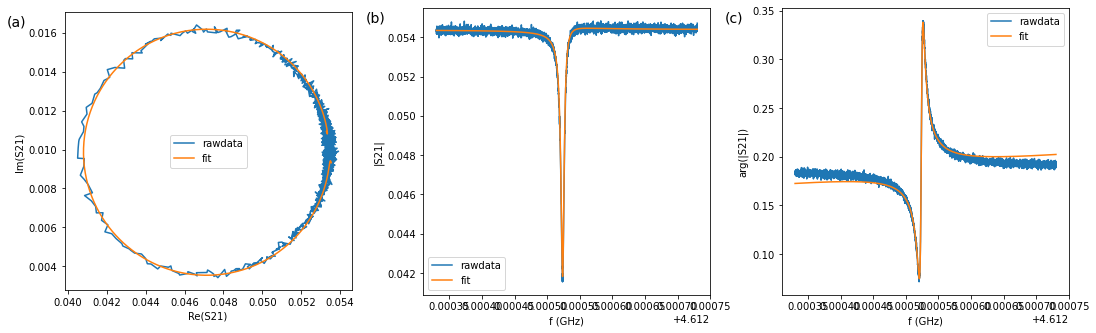

2.3981701180453285e-05
1.10847
New fit


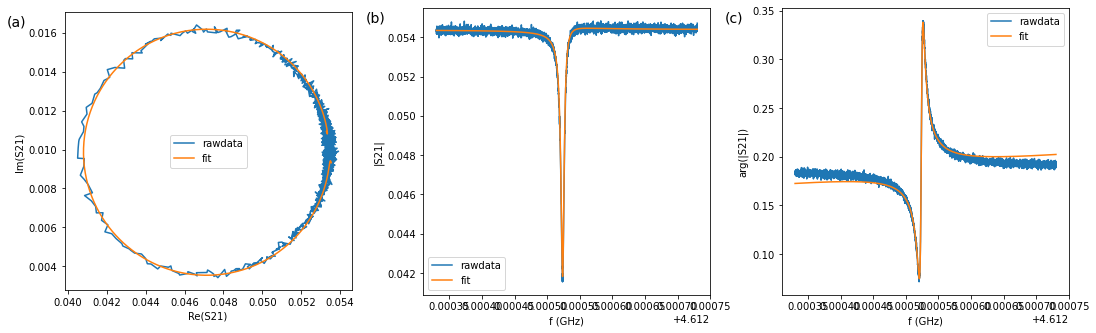

2.3981701180453285e-05
1.47218
New fit


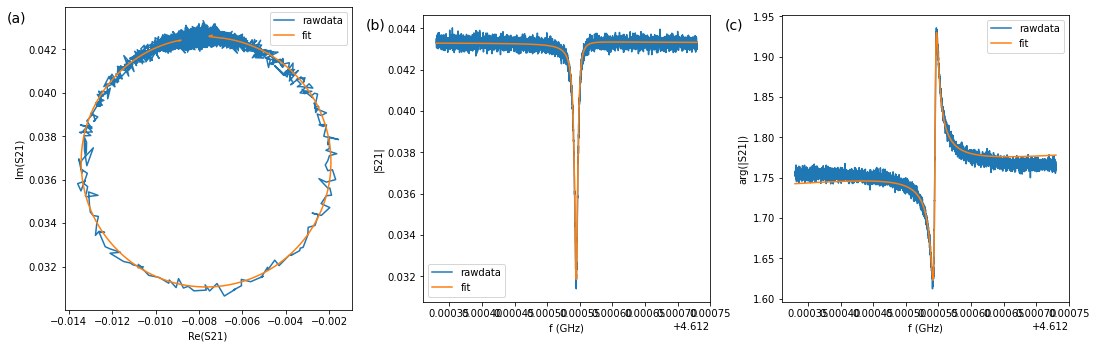

4.4733733516544305e-05
1.54449
New fit


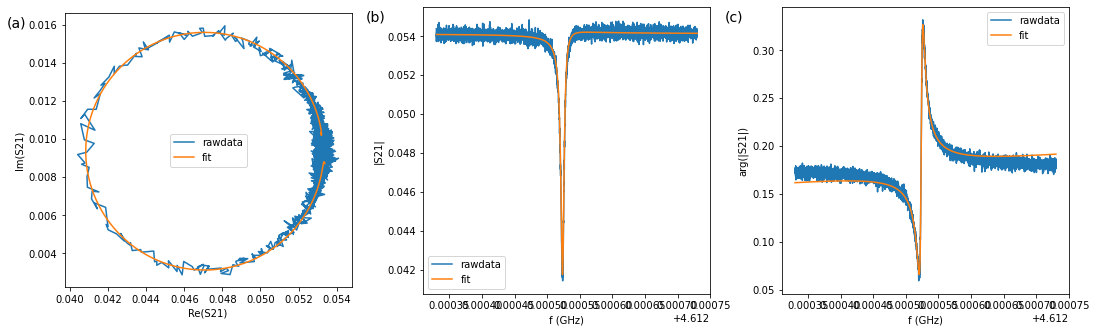

2.3866244891479482e-05
1.54464
New fit


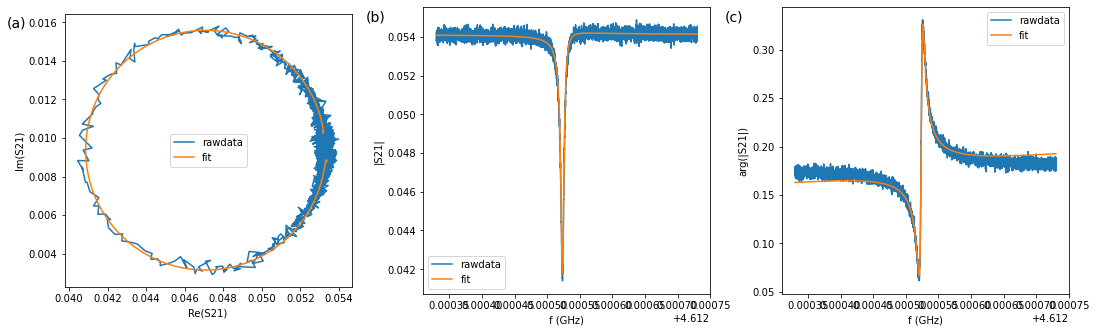

2.373685876744247e-05
1.54464
New fit


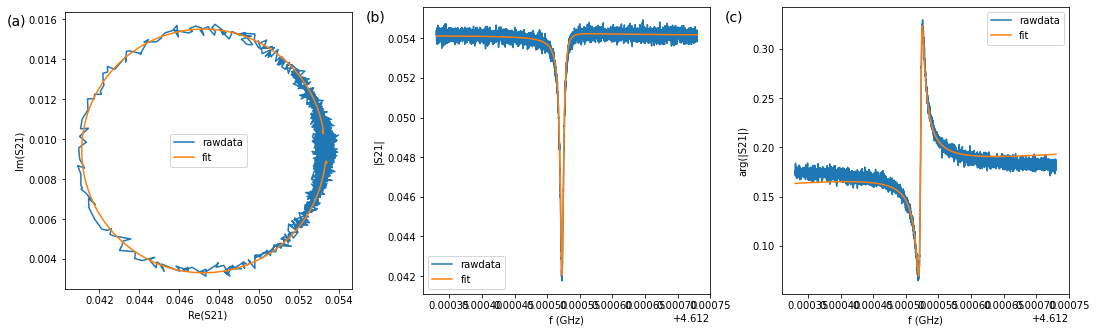

2.2964711694051232e-05
1.72011
New fit


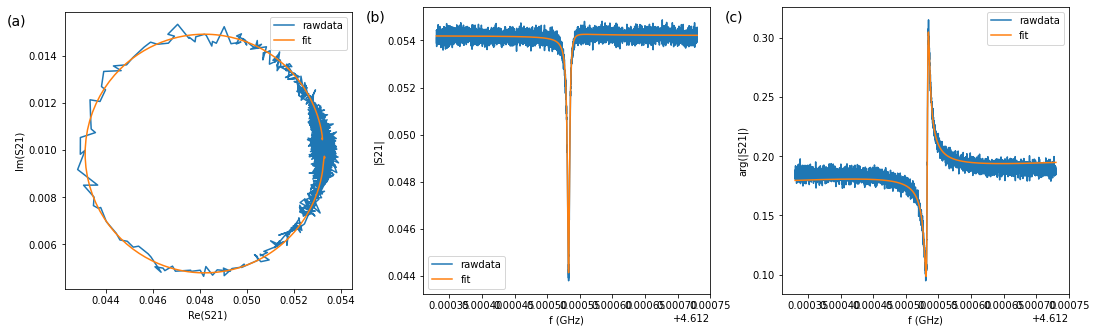

3.304662121728086e-05


In [91]:
for resonator in range(10):
    print("NEW RESONATOR --> ", resonator)
#     resonator = 0
    file_address_loop = sample_measurement_address+"\\"+sample_measurement_data[resonator]
    print(file_address_loop[60:])
    mat = loadmat(file_address_loop)
    temps = mat['temps'][0]

    
    print(mags.shape)
    start_freq = mat['vna'][0][0][2][0][0]
    stop_freq = mat['vna'][0][0][3][0][0]
    nop = mat['vna'][0][0][4][0][0]
    freqs = np.linspace(start_freq, stop_freq, nop)
    phas = mat['phas'][:,:nop]
    print(phas.shape)
    mags = mat['mags'][:,:nop]

    resonanse_freq = np.array([])
    resonanse_ql = np.array([])
    resonanse_qc = np.array([])
    resonanse_qi = np.array([])

    resonanse_freq_err = np.array([])
    resonanse_ql_err = np.array([])
    resonanse_qc_err = np.array([])
    resonanse_qi_err = np.array([])

    good_temps = np.array([])
    for p in range(len(temps)):
        print(temps[p])
        
        try:
            S21 = db2mag(mags[p])*np.exp(1j*(phas[p]))
            port1 = notch_port(freqs, S21)
            print('New fit')
            port1.autofit()
            port1.plotall()

            if port1.fitresults['Ql_err']/port1.fitresults['Ql']<0.3 and port1.fitresults['Ql_err']<1e11:
                good_temps = np.append(good_temps, temps[p])
                resonanse_freq = np.append(resonanse_freq, port1.fitresults['fr'])
                resonanse_ql = np.append(resonanse_ql, port1.fitresults['Ql'])
                resonanse_qc = np.append(resonanse_qc, port1.fitresults['absQc'])
                resonanse_qi = np.append(resonanse_qi, port1.fitresults['Qi_no_corr'])

                resonanse_freq_err = np.append(resonanse_freq_err, port1.fitresults['fr_err'])
                resonanse_ql_err = np.append(resonanse_ql_err, port1.fitresults['Ql_err'])
                resonanse_qc_err = np.append(resonanse_qc_err, port1.fitresults['absQc_err'])
                resonanse_qi_err = np.append(resonanse_qi_err, port1.fitresults['Qi_no_corr_err'])
                print(port1.fitresults['fr']/1e9-4.6125)
        except: 
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
            ax[0].plot(freqs, mags[p])
            ax[1].plot(freqs, phas[p])
#         time.sleep(1)

            
    
    file_directory = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data" 
    sample = sample_folders[sample_i_selected]
    meas = sample_measurements[measurement_i_selected]
    file_name = "Circlefit_res_" + str(resonator) + ".mat"
    sample_address = file_directory+"\\"+sample+"\\"+meas+"\\"+file_name

    fitting_state = dict()
    fitting_state['resonanse_freq'] = resonanse_freq
    fitting_state['resonanse_ql'] = resonanse_ql
    fitting_state['resonanse_qc'] = resonanse_qc
    fitting_state['resonanse_qi'] = resonanse_qi
    fitting_state['resonanse_freq_err'] = resonanse_freq_err
    fitting_state['resonanse_ql_err'] = resonanse_ql_err
    fitting_state['resonanse_qc_err'] = resonanse_qc_err
    fitting_state['resonanse_qi_err'] = resonanse_qi_err

    fitting_state['good_temps'] = good_temps

    fitting_state['original_file'] = file_address
    fitting_state['additional_room_attenuation'] = 20
    fitting_state['sample'] = sample


    savemat(sample_address, fitting_state)